In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageOps
import glob
from IPython import display
from IPython.display import display
import numpy as np
from pathlib import Path
import math
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils, to_categorical
import pyocr
import pyocr.builders
import sys
from pyzbar.pyzbar import decode

In [2]:
# mylibから関数呼び出し
from mylib import preprocess
from mylib import recognition
from mylib import angle_numblock12
from mylib import barcode_mark

In [3]:
# 認識する"i.jpg"の指定
i=7

In [4]:
# ディレクトリ
path = os.path.expanduser('~/eti_database')
os.chdir(path)
print("current directry " + os.getcwd())

current directry C:\Users\tyama\eti_database


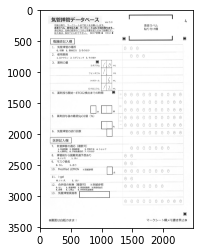

In [5]:
# 元となるjpg読み込み
scan = f"./image/{i:05d}.jpg"
img = cv2.imread(scan)
plt.imshow(img, cmap="gray")
plt.show()

In [6]:
# 角度補正の実行
angle_numblock12.rotatefile(i)

angle.jpg was created


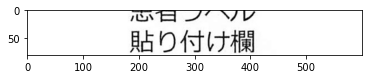

error
認識された固有番号: 00004


,fileno,no,ID,loc,drug,NaN1,NaN2,NaN3,NaN4,dur_1,...,att,NaN5,ind,dam,mask,mlemon,igel,comp,NaN6,empty
0,00007,00004,error,[0 1 2 3 6 7 8 9],[1 2 3 4 5 6 7 8],[0 2 3 4 5 6 7 8 9],[0 2 3 4 5 6 7 8 9],[0 1 2 3 4 5 6 7 8 9],[0 1 2 3 4 5 6 7 8 9],[0 1 2 3 4 5 6 7 8 9],...,[1 2 3 4 5 6 7 8 9],[4 5 6 7 8 9],[0 1 2 3 4 5 6 7 9],[0 1 4 5 9],[0 1 7 8 9],[0 1 2 3 4 5 6 7 8 9],[0 1 7 8 9],[0 1 2 3 4 5 6 7 8 9],[1 2 3 4 5 6 7 8 9],[0 1 2 3 4 5 6 7 8 9]


mark.csv was created


In [7]:
# バーコード・マークシートの認識 
# CSV出力
barcode_mark.barcodemark(i)

In [8]:
# 手書き数字ファイル薬剤量エリアの切り取り
angle_numblock12.trim_tegaki(i)

crop.jpg was created


In [9]:
# 12枚の数字ファイルの作成とトリミング
angle_numblock12.makenum_trim(i)

tegaki.jpg was created


In [10]:
# preprocess実行
os.chdir("tegakinum_drug")
if os.path.exists(f'num_output_{i:05d}'):
    os.chdir(f'num_output_{i:05d}')
    for k in range(0,12):
        if os.path.exists(f'tegaki_{k:02d}.jpg'):
            try:
                preprocess.preprocessing(k)
            except IndexError:
                print(f'前処理エラー_tegaki_{k:02d}.jpg')

前処理完了_tegaki_01_prepro
前処理完了_tegaki_02_prepro
前処理完了_tegaki_04_prepro
前処理エラー_tegaki_05.jpg
前処理エラー_tegaki_07.jpg
前処理完了_tegaki_08_prepro
前処理完了_tegaki_10_prepro
前処理完了_tegaki_11_prepro


In [11]:
# for構文で12枚数字認識、エラーは0を表示、list作成
result = []
if __name__ == '__main__':
    result.append(f'{i:05d}')
    print(f'固有番号: {i:05d}')
    for k in range(0, 12):        
        if (k % 3) == 0: # kを3で割った余りが0のとき
            continue
        if os.path.exists(f"tegaki_{k:02d}_prepro.jpg"):
            try:
                predict_number, probability_number = recognition.recognizing(i, k)
                result.append(predict_number)
                result.append(probability_number)
            except TypeError:
                print("predict_number error: emp")
                result.append("er")
                result.append("er")
        else:
                print("file not exist")
                result.append("emp")
                result.append("emp")

固有番号: 00007
1/1 [==============================] - 0s 274ms/step
predict_y: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
predict_number: 1
probability_number: 100.0
1/1 [==============================] - 0s 160ms/step
predict_y: [0.999 0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
predict_number: 0
probability_number: 99.90000128746033
1/1 [==============================] - 0s 184ms/step
predict_y: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
predict_number: 1
probability_number: 100.0
file not exist
file not exist
1/1 [==============================] - 0s 143ms/step
predict_y: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
predict_number: 6
probability_number: 100.0
1/1 [==============================] - 0s 140ms/step
predict_y: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
predict_number: 1
probability_number: 100.0
1/1 [==============================] - 0s 141ms/step
predict_y: [0.    0.001 0.999 0.    0.    0.    0.    0.    0.    0.   ]
predict_number: 2
probability_number: 99.90000128746033


In [12]:
# CSV出力
df4 = pd.DataFrame(
data = [result], 
columns = ["fileno", 'm1', 'p_m1', 'm2','p_m2', 'f1', 'p_f1','f2', 'p_f2', 'k1', 'p_k1','k2', 'p_k2', 'r1', 'p_r1','r2', 'p_r2']
)

display(df4)
os.chdir("../../")
df4.to_csv(f'./csv/{i:05d}_drug.csv')

,fileno,m1,p_m1,m2,p_m2,f1,p_f1,f2,p_f2,k1,p_k1,k2,p_k2,r1,p_r1,r2,p_r2
0,00007,1,100.0,0,99.900001,1,100.0,emp,emp,emp,emp,6,100.0,1,100.0,2,99.900001


In [14]:
# csv結合
mark = pd.read_csv(f"./csv/{i:05d}_mark.csv", index_col=0)
drug = pd.read_csv(f"./csv/{i:05d}_drug.csv", index_col=0)
result = mark.merge(drug, on="fileno")
result.to_csv(f'./concatcsv/{i:05d}.csv')

In [ ]:
print("current directry " + os.getcwd())

,fileno,no,ID,loc,drug,NaN1,NaN2,NaN3,NaN4,dur_1,...,f2,p_f2,k1,p_k1,k2,p_k2,r1,p_r1,r2,p_r2
0,7,4,error,[0 1 2 3 6 7 8 9],[1 2 3 4 5 6 7 8],[0 2 3 4 5 6 7 8 9],[0 2 3 4 5 6 7 8 9],[0 1 2 3 4 5 6 7 8 9],[0 1 2 3 4 5 6 7 8 9],[0 1 2 3 4 5 6 7 8 9],...,emp,emp,emp,emp,6,100.0,1,100.0,2,99.900001
